In [3]:
from torch.utils.data import DataLoader
import torch
import ssl
from Solvers import SolverEmbedding,Loss
from scipy.stats import norm
import os
from Models.EncoderModels import TextEncoderWithATTN,TransferLearningALBERT,TextEncoder
from config import cfg
from dataEmbedding.dataEmbedding import Read_Load_BuildBatch
from dataEmbedding.dataEmbeddingLoader import GenerateDataLoader,check_dataset,collate_embedding
from dataEmbedding.generateEmbedding import build_embeedings_CWGAN, singleRun
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import cKDTree
import pickle


In [ ]:
with open('./../InfoData/Embedding_train_data.pkl', 'rb') as pickle_file:
    train=pickle.load(pickle_file)

In [ ]:
with open('./../InfoData/Embedding_val_data.pkl', 'rb') as pickle_file:
    val=pickle.load(pickle_file)

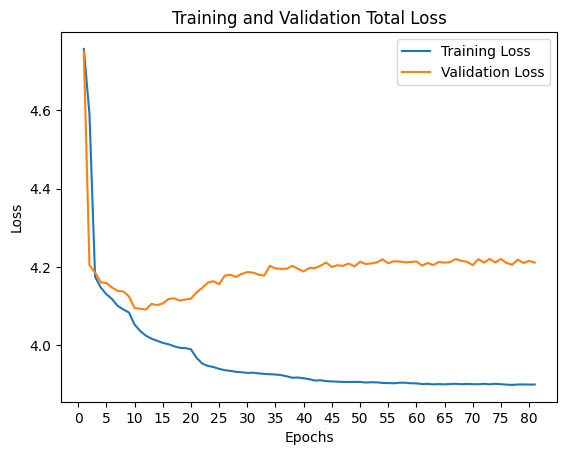

In [6]:
from matplotlib.pylab import plt
from numpy import arange


epochs = range(1, 82)
 
plt.plot(range(1,82), train['total_loss'], label='Training Loss')
plt.plot(range(1,82), val['total_loss'], label='Validation Loss')
 
# Add in a title and axes labels
plt.title('Training and Validation Total Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# Set the tick locations
plt.xticks(arange(0, 82, 5))
 
# Display the plot
plt.legend(loc='best')
plt.show()

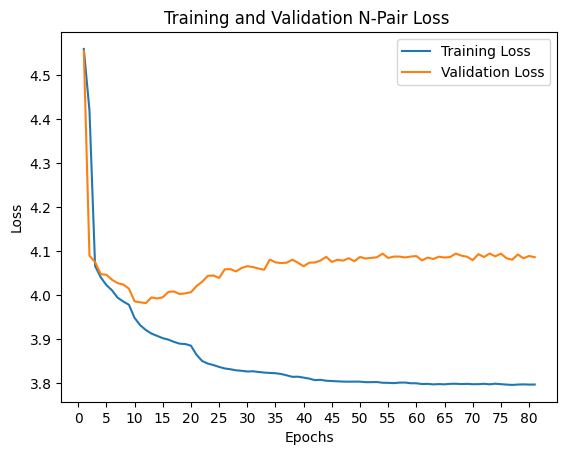

In [12]:
from matplotlib.pylab import plt
from numpy import arange


epochs = range(1, 82)
 
plt.plot(range(1,82), train['n_pair_loss'], label='Training Loss')
plt.plot(range(1,82), val['n_pair_loss'], label='Validation Loss')
 
# Add in a title and axes labels
plt.title('Training and Validation N-Pair Loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# Set the tick locations
plt.xticks(arange(0, 82, 5))
 
# Display the plot
plt.legend(loc='best')
plt.show()

In [4]:
stanData=Read_Load_BuildBatch(cfg.EMBEDDING_BATCH_SIZE)

Build Similarity Matrix

In [5]:
with open('./../GeneratedEmbeddings/val.p', 'rb') as pickle_file:
    tmp=pickle.load(pickle_file)

simMatTest=np.zeros([len(tmp),128])

for i,elem in enumerate(tmp):
    simMatTest[i]=elem[3].cpu()

simMatTest=torch.tensor(simMatTest)
normMatrix=torch.matmul(torch.norm(simMatTest,dim=1,keepdim=True),torch.norm(simMatTest,dim=1,keepdim=True).T)
similarityMatrix=torch.matmul(simMatTest,simMatTest.T)
cosineDistane=similarityMatrix/normMatrix




In [6]:
def findKclosestElementsEuclidean(data,vectorIdx,k):
    elems=[]
    distance=np.zeros([len(data),1])
    for i in range(len(data)):
        if vectorIdx==i:
            distance[i]=1000
        distance[i]=(data[i][3].cpu()-data[vectorIdx][3].cpu()).pow(2).sum().sqrt()
    sorted_indices = distance[:,0].argsort()
    indices_of_smallest = sorted_indices[:k]
    Mainvalues = [stanData.idx_to_word[str(key)] for key in data[vectorIdx][4].tolist() if key!=0]

    for i in indices_of_smallest:
        values = [stanData.idx_to_word[str(key)] for key in data[i][4].tolist() if key!=0]

        elems.append(' '.join(values))

    print("Main vector: "+' '.join(Mainvalues))
    print()
    print("Closest embeddings:")
    for i in elems:
        print(i)

In [8]:
def findKclosestElementsCosine(data,matrix,vectorIdx,k):
    elems=[]
    sorted_indices = matrix[vectorIdx].argsort()
    indices_of_smallest = sorted_indices[:k]
    Mainvalues = [stanData.idx_to_word[str(key)] for key in data[vectorIdx][4].cpu().tolist() if key!=0]
    
    for i in indices_of_smallest:
        values = [stanData.idx_to_word[str(key)] for key in data[i][4].cpu().tolist() if key!=0]

        elems.append(' '.join(values))

    print("Main vector: "+' '.join(Mainvalues))
    print()
    print("Closest embeddings:")
    for i in elems:
        print(i)


In [10]:
findKclosestElementsEuclidean(tmp,7,20)

Main vector: pool , red table attach leg and on dining just

Closest embeddings:
pool , red table attach leg and on dining just
on stainless table a plastic leg
on stainless table a plastic leg
on anything round table gold quite seat h bottom style peacock on like figure
on anything simple red table a compose leg
on cluster stainless bolt padding bottom table a ivory
on attach leg , table perpendicular have on low l look there
reddish table be simple it purple and be bottom union on at
reddish be on stainless simple compose high
on stainless simple while table
seat shape ground simple table a on up
round simple table
reddish be on ) leather backside anything table
on at contemporary table a latticed gold attach dinner quite cherry the contemporary
seat sled coating table chair make point 4 have round elegant leg
table.two depression 90 begin place
on stainless table a leg wooden in bottom and curved
on table a attach metallic and poly up
on , simple five temper quite good weld place
re

In [9]:
findKclosestElementsCosine(tmp,cosineDistane,100,9)

Main vector: on velit polish structured round table a contemporary low and live oversize leg

Closest embeddings:
stainless point height rotate a cushion pink and float only place ball cloth and float style look leg
on outdoor simple rotate a plastic velit work leg the with military and metal place the just
on arch simple rotate a on pair object secondary thick the silver and easy be nine make inside head
on keyboard than rotate a metal cloth and seat lamp it the - with 4 navy place rectangular leg
seat one rotate chair make never of seem upper pink and attach leg chair make dinner
reddish be on ventilation , could one back a rack place sofa painting facility the silver
on rail simple seater rotate a broad on silver part the part be stainless and wardrobe bend
which punch rotate a on fasioned dusk with below quite the silver find semi flat navy eames anything hand
on rotate a on hand shop and leg and on at downwards balance silver and with
